In [1]:
import pandas as pd
import os
import torch
import matplotlib.pyplot as plt

In [2]:
from basicRNN import *
print(device)

cuda


self.time_points 900
data.shape torch.Size([10000, 200, 1716])
self.spacing 2
data.shape torch.Size([9999, 833, 199])
labels.shape torch.Size([9999, 1])
self.labels_names ['Wind0']


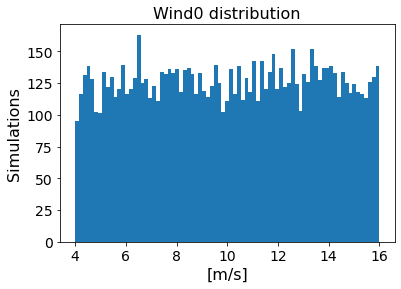

data.shape torch.Size([9977, 833, 199])
labels.shape torch.Size([9977, 1])
labels scales tensor([15.9988])
labels scales tensor([0.6282])
train_dataset 7982
test_dataset 1995
Epoch [1/40]], Loss: 0.055681, , Loss Val: 0.378479
Epoch [2/40]], Loss: 0.045552, , Loss Val: 0.329022
Epoch [3/40]], Loss: 0.042862, , Loss Val: 0.363627
Epoch [4/40]], Loss: 0.051800, , Loss Val: 0.387526


KeyboardInterrupt: 

In [3]:
for i, q in enumerate(['Wind0']):
    ts = trainingService('config/paramsConfigGRU' + q + '.yml')
    ts.loadData()
    ts.setupModel()
    ts.trainModel(learning_rate=5e-6, weight_decay=0.0, num_epochs=40)
    plotResults(ts)

self.time_points 425
data.shape torch.Size([10000, 200, 1716])
self.spacing 5
data.shape torch.Size([9999, 429, 199])
labels.shape torch.Size([9999, 1])
self.labels_names ['Wind0']


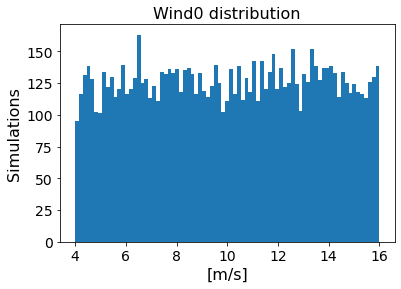

data.shape torch.Size([9977, 429, 199])
labels.shape torch.Size([9977, 1])
labels scales tensor([15.9988])
labels scales tensor([0.6282])
train_dataset 7982
test_dataset 1995


RuntimeError: Error(s) in loading state_dict for MultivariateGRU:
	Missing key(s) in state_dict: "gru.weight_ih_l4", "gru.weight_hh_l4", "gru.bias_ih_l4", "gru.bias_hh_l4". 

In [3]:
for i, q in enumerate(['Wind0']):
    ts = trainingService('config/paramsConfigGRU' + q + '.yml')
    ts.loadData()
    ts.setupModel()
    ts.loadModel()
    plotResults(ts)

In [ ]:
for i, q in enumerate(['Strehl', 'Seeing', 'L0']):
    ts = trainingService('config/paramsConfigGRU' + q + '.yml')
    ts.loadData()
    ts.setupModel()
    ts.loadModel()
    plotResults(ts)

In [ ]:
for i, q in enumerate([ 'Strehl', 'Seeing', 'L0']):
    ts = trainingService('config/paramsConfigGRU' + q + '.yml')
    ts.loadData()
    ts.setupModel()
#    ts.loadModel()
    ts.trainModel(learning_rate=5e-4, weight_decay=0.2e-5, num_epochs=10)
    ts.trainModel(learning_rate=5e-5, weight_decay=0.0, num_epochs=20)
    ts.trainModel(learning_rate=5e-6, weight_decay=0.0, num_epochs=30)
    plotResults(ts)

In [ ]:
for i, q in enumerate(['Wind0', 'Wind1', 'Wind2', 'Wind3', 'Wind']):
    ts = trainingService('config/paramsConfigGRU' + q + '.yml')
    ts.loadData()
    ts.setupModel()
#    ts.loadModel()
    ts.trainModel(learning_rate=5e-4, weight_decay=1e-6, num_epochs=20)
    ts.trainModel(learning_rate=5e-5, weight_decay=0.0, num_epochs=30)
    ts.trainModel(learning_rate=5e-6, weight_decay=0.0, num_epochs=30)
    plotResults(ts)

In [ ]:
for i, q in enumerate(['Wind0', 'Wind1', 'Wind2', 'Wind3', 'Wind']):
    ts = trainingService('config/paramsConfigGRU' + q + '.yml')
    ts.loadData()
    ts.setupModel()
#    ts.loadModel()
    ts.trainModel(learning_rate=5e-4, weight_decay=0.2e-5, num_epochs=10)
    ts.trainModel(learning_rate=5e-5, weight_decay=0.0, num_epochs=20)
    ts.trainModel(learning_rate=5e-6, weight_decay=0.0, num_epochs=30)
    plotResults(ts)